In [1]:
### Calculate LISI Index to evaluate integration after scanorama

#############################################
# Prerequisites - Load Libraries

In [2]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1//lib/R/library"



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
   

In [3]:
source('MS4_Plot_Config.r')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


###############################################
# Preqrequisites Configurations & Parameters

In [4]:
data_path =  '../data/current'

In [5]:
result_path =  '../results/current'

# Data

In [24]:
## Data after scanorama integration

In [25]:
path = paste0(result_path, '/B-Analysis/', 'B2_Scanorama_Annotations.csv')
library_annotation_scanorama = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-03-04 14:14:42 CET"


In [26]:
path = paste0(result_path, '/B-Analysis/', 'B2_Scanorama_UMAP_Embedding.csv')
umap_embedding_scanorama =  read.csv(path)
print(file.info(path)$mtime)

[1] "2024-03-04 14:14:42 CET"


In [27]:
rownames(library_annotation_scanorama) = library_annotation_scanorama$X
library_annotation_scanorama$X = NULL

In [28]:
head(library_annotation_scanorama,2)

,library_id
,<chr>
AAACCCACATACAGGG-1-L1,L1
AAACCCACATGACTTG-1-L1,L1


In [29]:
rownames(umap_embedding_scanorama) = umap_embedding_scanorama$X
umap_embedding_scanorama$X = NULL

In [30]:
head(umap_embedding_scanorama,2)

,X1,X2
,<dbl>,<dbl>
AAACCCACATACAGGG-1-L1,3.746732,-1.571113
AAACCCACATGACTTG-1-L1,17.418547,5.574673


In [31]:
## Data before scanorama integration

In [32]:
path = paste0(result_path, '/B-Analysis/', 'B2_Concat_Annotations.csv')
library_annotation_concat = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-03-04 14:48:46 CET"


In [33]:
path = paste0(result_path, '/B-Analysis/', 'B2_Concat_UMAP_Embedding.csv')
umap_embedding_concat =  read.csv(path)
print(file.info(path)$mtime)

[1] "2024-03-04 14:48:53 CET"


In [34]:
rownames(library_annotation_concat) = library_annotation_concat$X
library_annotation_concat$X = NULL

In [35]:
head(library_annotation_concat,2)

,library_id
,<chr>
AAACCCACATACAGGG-1-L1,L1
AAACCCACATGACTTG-1-L1,L1


In [36]:
rownames(umap_embedding_concat ) = umap_embedding_concat$X
umap_embedding_concat $X = NULL

In [37]:
head(umap_embedding_concat ,2)

,X1,X2
,<dbl>,<dbl>
AAACCCACATACAGGG-1-L1,-3.006969,10.431176
AAACCCACATGACTTG-1-L1,9.068130,7.331071


# LISI calculation

In [38]:
perplexity_param = 30

In [39]:
### For scanorama embedding

In [40]:
unique(library_annotation_scanorama$library_id)

[1] "L1"  "L2"  "L3"  "L4"  "L5"  "L6"  "L7"  "L8"  "L9"  "L10" "L11" "L12"
[13] "L13" "L14"

In [41]:
res = compute_lisi(umap_embedding_scanorama, library_annotation_scanorama, c('library_id'), perplexity = perplexity_param)

In [42]:
head(res,2)

,library_id
,<dbl>
AAACCCACATACAGGG-1-L1,5.515944
AAACCCACATGACTTG-1-L1,6.362144


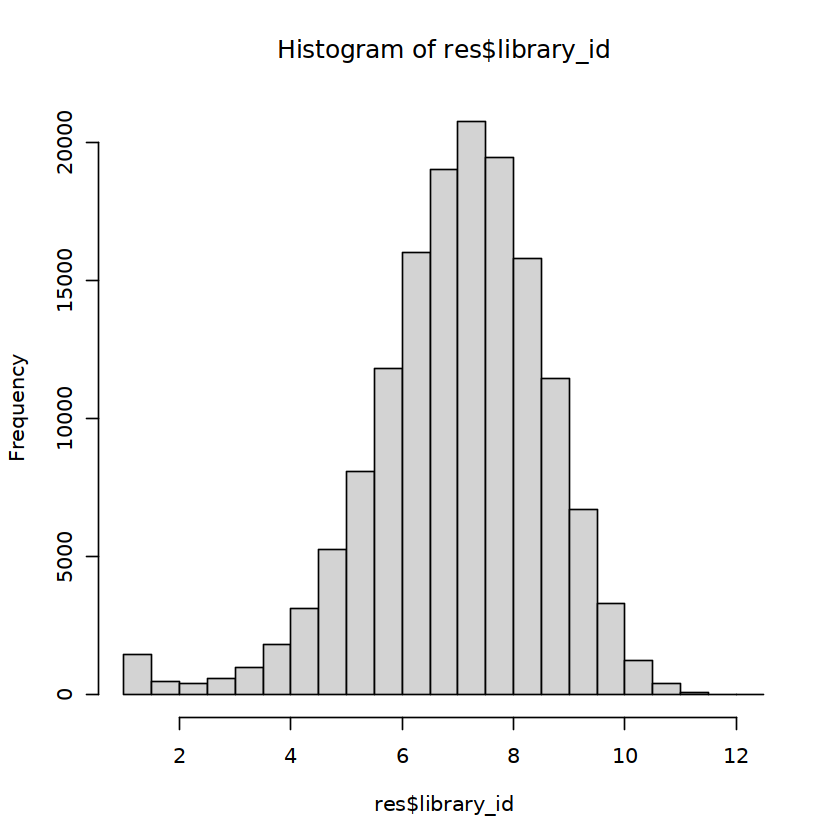

In [43]:
hist(res$library_id)

In [44]:
mean(res$library_id)

[1] 6.991528

In [45]:
### For concat embedding

In [46]:
unique(library_annotation_concat$library_id)

[1] "L1"  "L2"  "L3"  "L4"  "L5"  "L6"  "L7"  "L8"  "L9"  "L10" "L11" "L12"
[13] "L13" "L14"

In [47]:
res_concat = compute_lisi(umap_embedding_concat, library_annotation_concat, c('library_id'), perplexity = perplexity_param)

In [48]:
head(res_concat,2)

,library_id
,<dbl>
AAACCCACATACAGGG-1-L1,9.519807
AAACCCACATGACTTG-1-L1,5.534970


In [49]:
mean(res_concat$library_id)

[1] 6.825574

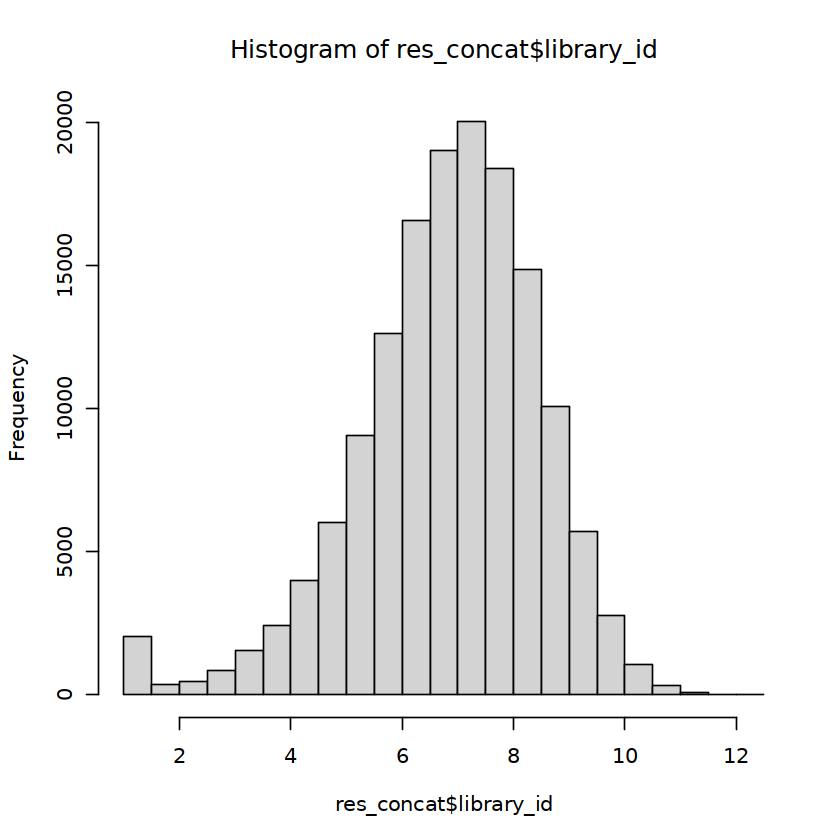

In [50]:
hist(res_concat$library_id)

In [51]:
### Combine and plot

In [52]:
res$type = 'scanorama_embedding'
res_concat$type = 'concat_embedding'

In [53]:
res_combined = rbind(res, res_concat)

In [54]:
figure_name = "SUPP9_B2_LISI_Comparison"

In [55]:
# Sizes of the plot
width_par = 5
height_par = 3

png 
  2

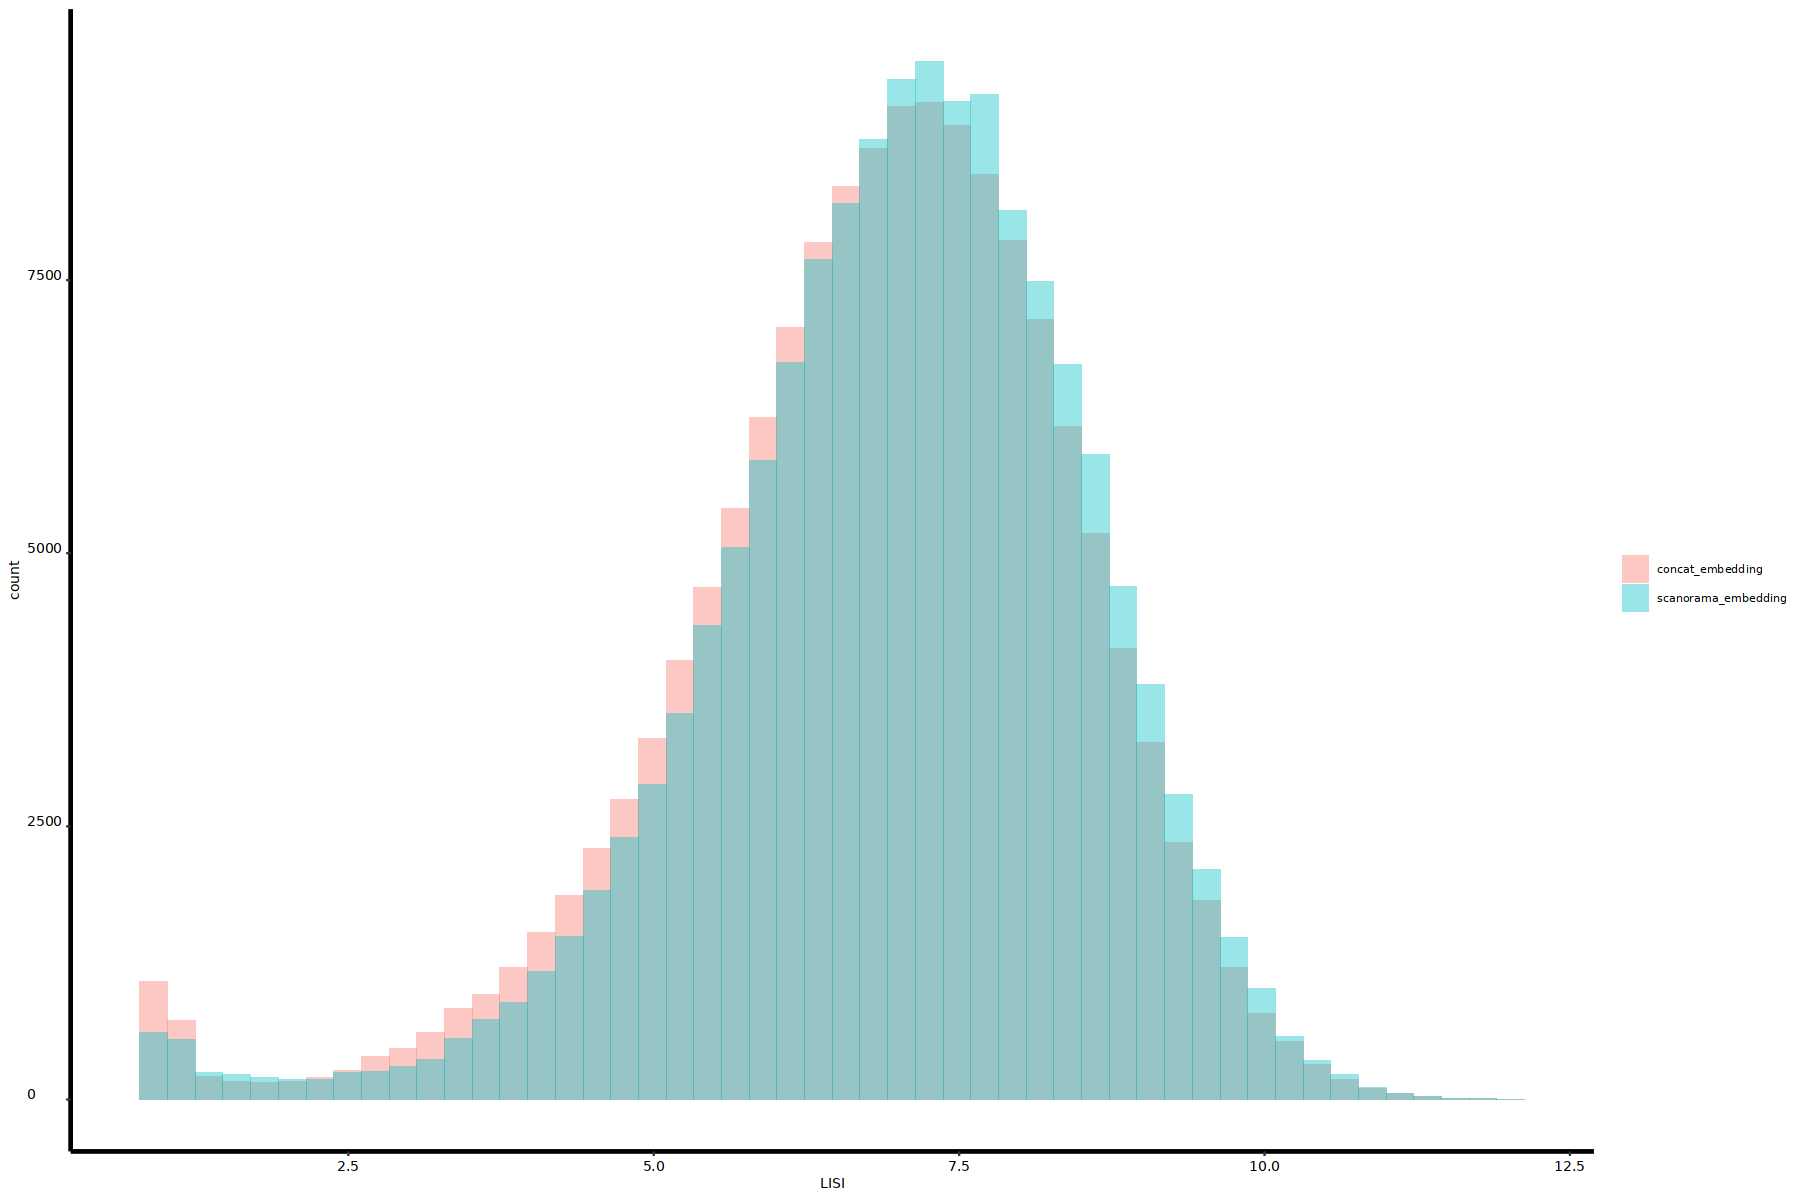

In [56]:
options(repr.plot.width=15, repr.plot.height=10)
pdf(paste0('figures/Supplementary_Figures/', figure_name,'.pdf'), width =width_par, height = height_par)
g =  ggplot(res_combined, aes(x =library_id, fill = type)) + geom_histogram(position = "identity", alpha = 0.4, bins = 50) +plot_config + xlab('LISI')
print(g)
dev.off()

g